# Analyzing Medical Data

In this exercise, you train an ML model to determine whether a patient might have diabetes.

The exercise uses the _Pima Indian Diabetes_ data set from the National Institute of Diabetes and Digestive and Kidney Diseases. 
The data set consists of approximately 800 cases of medical data for female patients with and without diabetes.
The data includes features such as blood pressure, heart rate, and age.
The data set is available as a CSV file in this repository.

Explore the data to recognize whether you can use it to train a model that recognizes patients who have diabetes.

> _NOTE:  In the interest of time, this notebook performs a simple and superficial analysis of the data.
A more detailed study would require more time._

### 1. Import the required libraries and load the data.

In [204]:
import pandas as pd
import matplotlib.pyplot as plt

In [205]:
data = pd.read_csv("data/diabetes.csv")
data.shape

(768, 9)

The data contains 768 rows and 9 columns.  

Use the `head` method  of the Pandas dataframe to preview the first five rows.

In [206]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### 2. Inspect basic information.

Use standard data analysis methods to start exploring the data.

Inspect the column names and associated data types.
The `info` method of a Pandas data frame displays the column names and data types in a data frame.

In [207]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Note the different value types:

* `Pregnancies`, `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, `Age`, and `Outcome` contain integer values.
* Body mass index(`BMI`) and `DiabetesPedigreeFuntion` contain float values.

Use the `describe` method to see basic statistical information for each column, such as percentiles, mean, and standard deviation.

In [208]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000



The dataset consists of several medical variables, which are the input features, and one target variable: `Outcome`.

* `Pregnancies`:     Number of times pregnant
* `Glucose`:         Plasma glucose concentration in an oral glucose tolerance test
* `Blood Pressure`:  Diastolic blood pressure (mm Hg)
* `SkinThickness`:   Triceps skin fold thickness (mm)
* `Insulin`:         2-Hour serum insulin (mu U/ml)
* `BMI`:             Body mass index (weight in kg/(height in m)^2)
* `DiabetesPedigreeFunction` Probability of diabetes based on family history
* `Age`:             Age (years)
* `Outcome`:         Target variable. Whether the patient has diabetes (`1`) or not (`0`)

Count the number are diabetes cases.

In [209]:
data.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

268 of 768 cases are diabetes cases.

### 3. Identify missing data

Plot the data to visualize the data distribution.
Use the `hist` method to plot a histogram.
You can use histograms to see how the data is distributed for each variable and detect outliers.

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

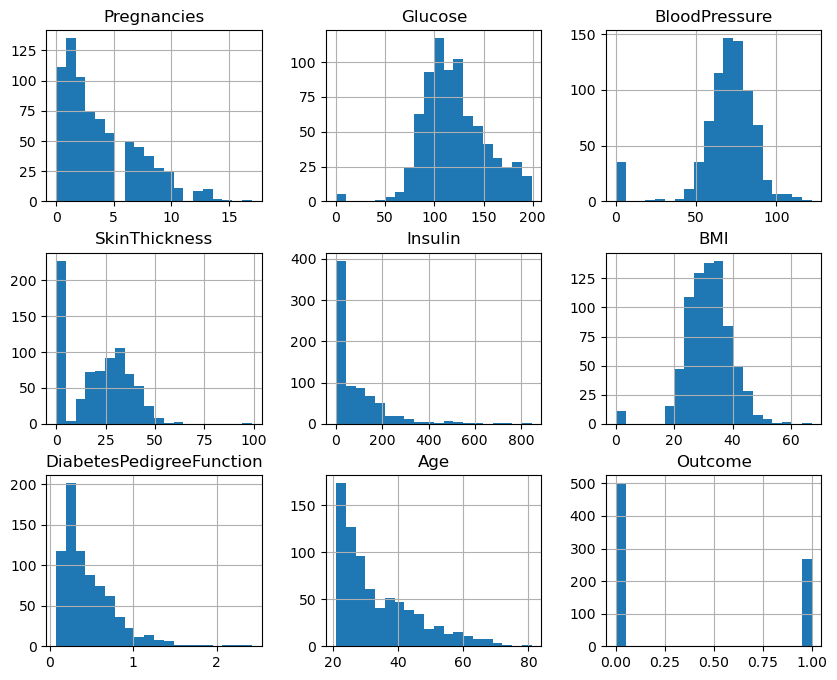

In [210]:
# Plot histograms of the columns on multiple subplots
plt.close('all')
data.hist(bins=20, figsize=(10, 8))

The dataset is evenly distributed except for some outliers in `BMI`, `Blood Pressure`, and `DiabetesPedigreeFunction`.

Additionally, note the high number of `0` values in the `SkinThickness` and `Insulin` features.
In this particular scenario, the `0` values might indicate missing data for those features.


Reuse the `head` method to see the `0` values in the data. Print the first 20 rows.

In [211]:
data.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


Print the last 20 rows of the dataset and determine if those rows also contain `0` values.

In [212]:
data.tail(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
748,3,187,70,22,200,36.4,0.408,36,1
749,6,162,62,0,0,24.3,0.178,50,1
750,4,136,70,0,0,31.2,1.182,22,1
751,1,121,78,39,74,39.0,0.261,28,0
752,3,108,62,24,0,26.0,0.223,25,0
753,0,181,88,44,510,43.3,0.222,26,1
754,8,154,78,32,0,32.4,0.443,45,1
755,1,128,88,39,110,36.5,1.057,37,1
756,7,137,90,41,0,32.0,0.391,39,0
757,0,123,72,0,0,36.3,0.258,52,1


Determine the number of `0` values in the dataset.

In [213]:
# Select all the rows and only the feature columns
feature_data = data.iloc[:, :-1]

# Count the total number of rows
num_cases = data.shape[0]

# Number & percent of '0's for each feature
numZero = (feature_data[:] == 0).sum()
perZero = ((feature_data[:] == 0).sum())/num_cases*100

print(f"\nRows, Feature columns: {feature_data.shape}")
print("\n== Number of 0's:")
print(numZero)
print("\n == Percentage of 0's:")
print(perZero)


Rows, Feature columns: (768, 8)

== Number of 0's:
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

 == Percentage of 0's:
Pregnancies                 14.453125
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
dtype: float64


Check either skin thickness is 0 or insulin is 0

In [214]:
either_is_zero = feature_data.query('SkinThickness == 0 | Insulin == 0')
either_is_zero
# either_is_zero[either_is_zero['SkinThickness']].count()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
5,5,116,74,0,0,25.6,0.201,30
7,10,115,0,0,0,35.3,0.134,29
...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43
762,9,89,62,0,0,22.5,0.142,33
764,2,122,70,27,0,36.8,0.340,27
766,1,126,60,0,0,30.1,0.349,47


Identify if duplicate exists

In [215]:
print(data[data.duplicated])

Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []


In [216]:
def count_outcome(data, col_name):
    selected_data = data[[col_name, 'Outcome']]
    selected_data = selected_data[selected_data[col_name] == 0]
    print("Counts of Outcome with", col_name, "is zero")
    print("non_diabetic: ", selected_data[selected_data['Outcome']== 0]['Outcome'].count())
    print("diabetic: ", selected_data[selected_data['Outcome']== 1]['Outcome'].count())
    
count_outcome(data, "SkinThickness")
print()
count_outcome(data, "Insulin")


NameError: name 'selected_df' is not defined

The data set contains 227 zero values for `SkinThickness` and 374 zero values for `Insulin`.
Aproximately half of the cases have missing insulin values.

To build and train a reliable ML model, you should address these missing values.
However, for the sake of simplicity, this exercise keeps the outliers in the dataset.

Verify whether the missing data values are correlated to each other.

### 4. Look for correlations

Compute the _standard correlation coefficient_ between every pair of attributes by using the `corr` method.
Note that, for bigger data sets, especially those with many features, computing the correlations might take a very long time.

In [182]:
corrM = data.corr()
corrM.style.background_gradient().format(precision=3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000,0.129,0.141,-0.082,-0.074,0.018,-0.034,0.544,0.222
Glucose,0.129,1.000,0.153,0.057,0.331,0.221,0.137,0.264,0.467
BloodPressure,0.141,0.153,1.000,0.207,0.089,0.282,0.041,0.240,0.065
SkinThickness,-0.082,0.057,0.207,1.000,0.437,0.393,0.184,-0.114,0.075
Insulin,-0.074,0.331,0.089,0.437,1.000,0.198,0.185,-0.042,0.131
BMI,0.018,0.221,0.282,0.393,0.198,1.000,0.141,0.036,0.293
DiabetesPedigreeFunction,-0.034,0.137,0.041,0.184,0.185,0.141,1.000,0.034,0.174
Age,0.544,0.264,0.240,-0.114,-0.042,0.036,0.034,1.000,0.238
Outcome,0.222,0.467,0.065,0.075,0.131,0.293,0.174,0.238,1.000


The data does not show strong correlations, which means that there is a notable degree of independency across the features.

The `Pregnancies` and `Age` features have a moderate correlation.

The `Insulin` and `SkinThickness` columns, which include many missing values, have a correlation value of 0.437, which might be caused by the high number `0` values in these two features.

In [183]:
data.skew()

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

In [189]:
def replace_zero_to_mean(col):
    mean = data[col].mean()
    data[col] = data[col].replace(0, mean)

replace_zero_to_mean('Glucose')
replace_zero_to_mean('SkinThickness')
replace_zero_to_mean('BMI')
replace_zero_to_mean('BloodPressure')
replace_zero_to_mean('Insulin')

numZero = (data[:] == 0).sum()
print(numZero)


Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [190]:
data.skew()

Pregnancies                 0.901674
Glucose                     0.533225
BloodPressure               0.173050
SkinThickness               1.226670
Insulin                     3.291825
BMI                         0.601103
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

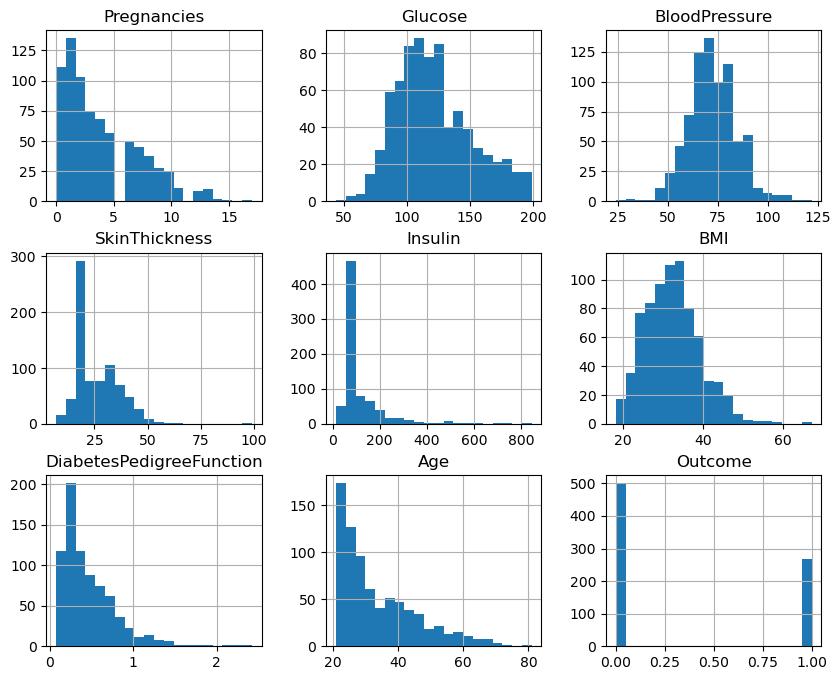

In [191]:
# Plot histograms of the columns on multiple subplots
plt.close('all')
data.hist(bins=20, figsize=(10, 8))

In [ ]:
# Pregnancies                 0.901674
# Glucose                     0.533225
# BloodPressure               0.173050
# SkinThickness               1.226670
# Insulin                     3.291825
# BMI                         0.601103
# DiabetesPedigreeFunction    1.919911
# Age                         1.129597
# Outcome                     0.635017

In [200]:
def find_skewed_dist_outliers(col):

    # data points that 
    # fall below the Q1 – 1.5 IQR 
    # or above Q3 + 1.5 IQR are outliers. 

    pct25 = data[col].quantile(0.25) 
    pct75 = data[col].quantile(0.75) 

    # calculate the iqr and range for each attribute
    iqr = pct75 - pct25 
    upper = pct75 + 1.5 * iqr 
    lower = pct25 - 1.5 * iqr 


    # detect and print number of outliers in each attribute
    outliers = data[(data[col] > upper) | (data[col] < lower)] 
    print('No. of outliers (IQR) in ', col,' = ', outliers.shape[0]) 

def find_normal_dist_outliers(col):

    # below or above
    # mean−3∗(standard deviation)

    h1 = data[col].mean() + 3*data[col].std() 
    w1 = data[col].mean() - 3*data[col].std()

    # get outliers based on the range identified between h and l
    outliers = data[(data[col] > h1) | (data[col] < w1)]
    print('No. of outliers (mean-std) in', col,'= ', outliers.shape[0]) 

find_normal_dist_outliers('BloodPressure')

find_skewed_dist_outliers('Pregnancies')
find_skewed_dist_outliers('Glucose')
find_skewed_dist_outliers('SkinThickness')
find_skewed_dist_outliers('Insulin')
find_skewed_dist_outliers('BMI')
find_skewed_dist_outliers('DiabetesPedigreeFunction')
find_skewed_dist_outliers('Age')   
find_skewed_dist_outliers('BMI')


No. of outliers (mean-std) in BloodPressure =  8
No. of outliers (IQR) in  Pregnancies  =  4
No. of outliers (IQR) in  Glucose  =  0
No. of outliers (IQR) in  SkinThickness  =  12
No. of outliers (IQR) in  Insulin  =  89
No. of outliers (IQR) in  BMI  =  8
No. of outliers (IQR) in  DiabetesPedigreeFunction  =  29
No. of outliers (IQR) in  Age  =  9
No. of outliers (IQR) in  BMI  =  8


In [217]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics 

In [223]:
# Select all the rows and only the feature columns
data_feature = data.iloc[:, :-1]
data_diabetes = data['Outcome']


## Decision Tree

In [265]:
X_train, X_test, Y_train, Y_test = train_test_split(data_feature, data_diabetes, 
             stratify=data_diabetes, test_size=0.2, random_state=1) 

min_sample = int(len(data) * 0.1) 
dtree = DecisionTreeClassifier(criterion = 'entropy', splitter="best", max_depth=20, 
            min_samples_leaf=5, min_samples_split=min_sample, random_state=42) 
dtree.fit(X_train, Y_train)

#Predict the response for test dataset
y_predict_dtree = dtree.predict(X_test)

In [266]:
from sklearn.metrics import roc_curve, roc_auc_score
def metrics_measure(Y_test, y_predict):
    # Using metrics' function parameters to derive performance measures
    acc = metrics.accuracy_score(Y_test, y_predict) 
    sens = metrics.recall_score(Y_test, y_predict,average='binary', pos_label=1) 
    spec = metrics.recall_score(Y_test, y_predict,average='binary', pos_label=0) 
    prec = metrics.precision_score(Y_test, y_predict,average='binary', pos_label=1) 
    f1 = metrics.f1_score(Y_test, y_predict,average='binary', pos_label=1) 
    auc = roc_auc_score(Y_test, y_predict)

    # display all the measures derived
    print("Accuracy : ", round(acc,3)) 
    print("Misclassification : ", round(1-acc,3)) 
    print("Precision : ", round(prec,3)) 
    print("Sensitivity/Recall 1: ", round(sens,3)) 
    print("Specificity/Recall 0: ", round(spec,3)) 
    print("F1-measure : ", round(f1,3)) 


metrics_measure(Y_test, y_predict_dtree)


Accuracy :  0.76
Misclassification :  0.24
Precision :  0.644
Sensitivity/Recall 1:  0.704
Specificity/Recall 0:  0.79
F1-measure :  0.673


<Figure size 640x480 with 0 Axes>

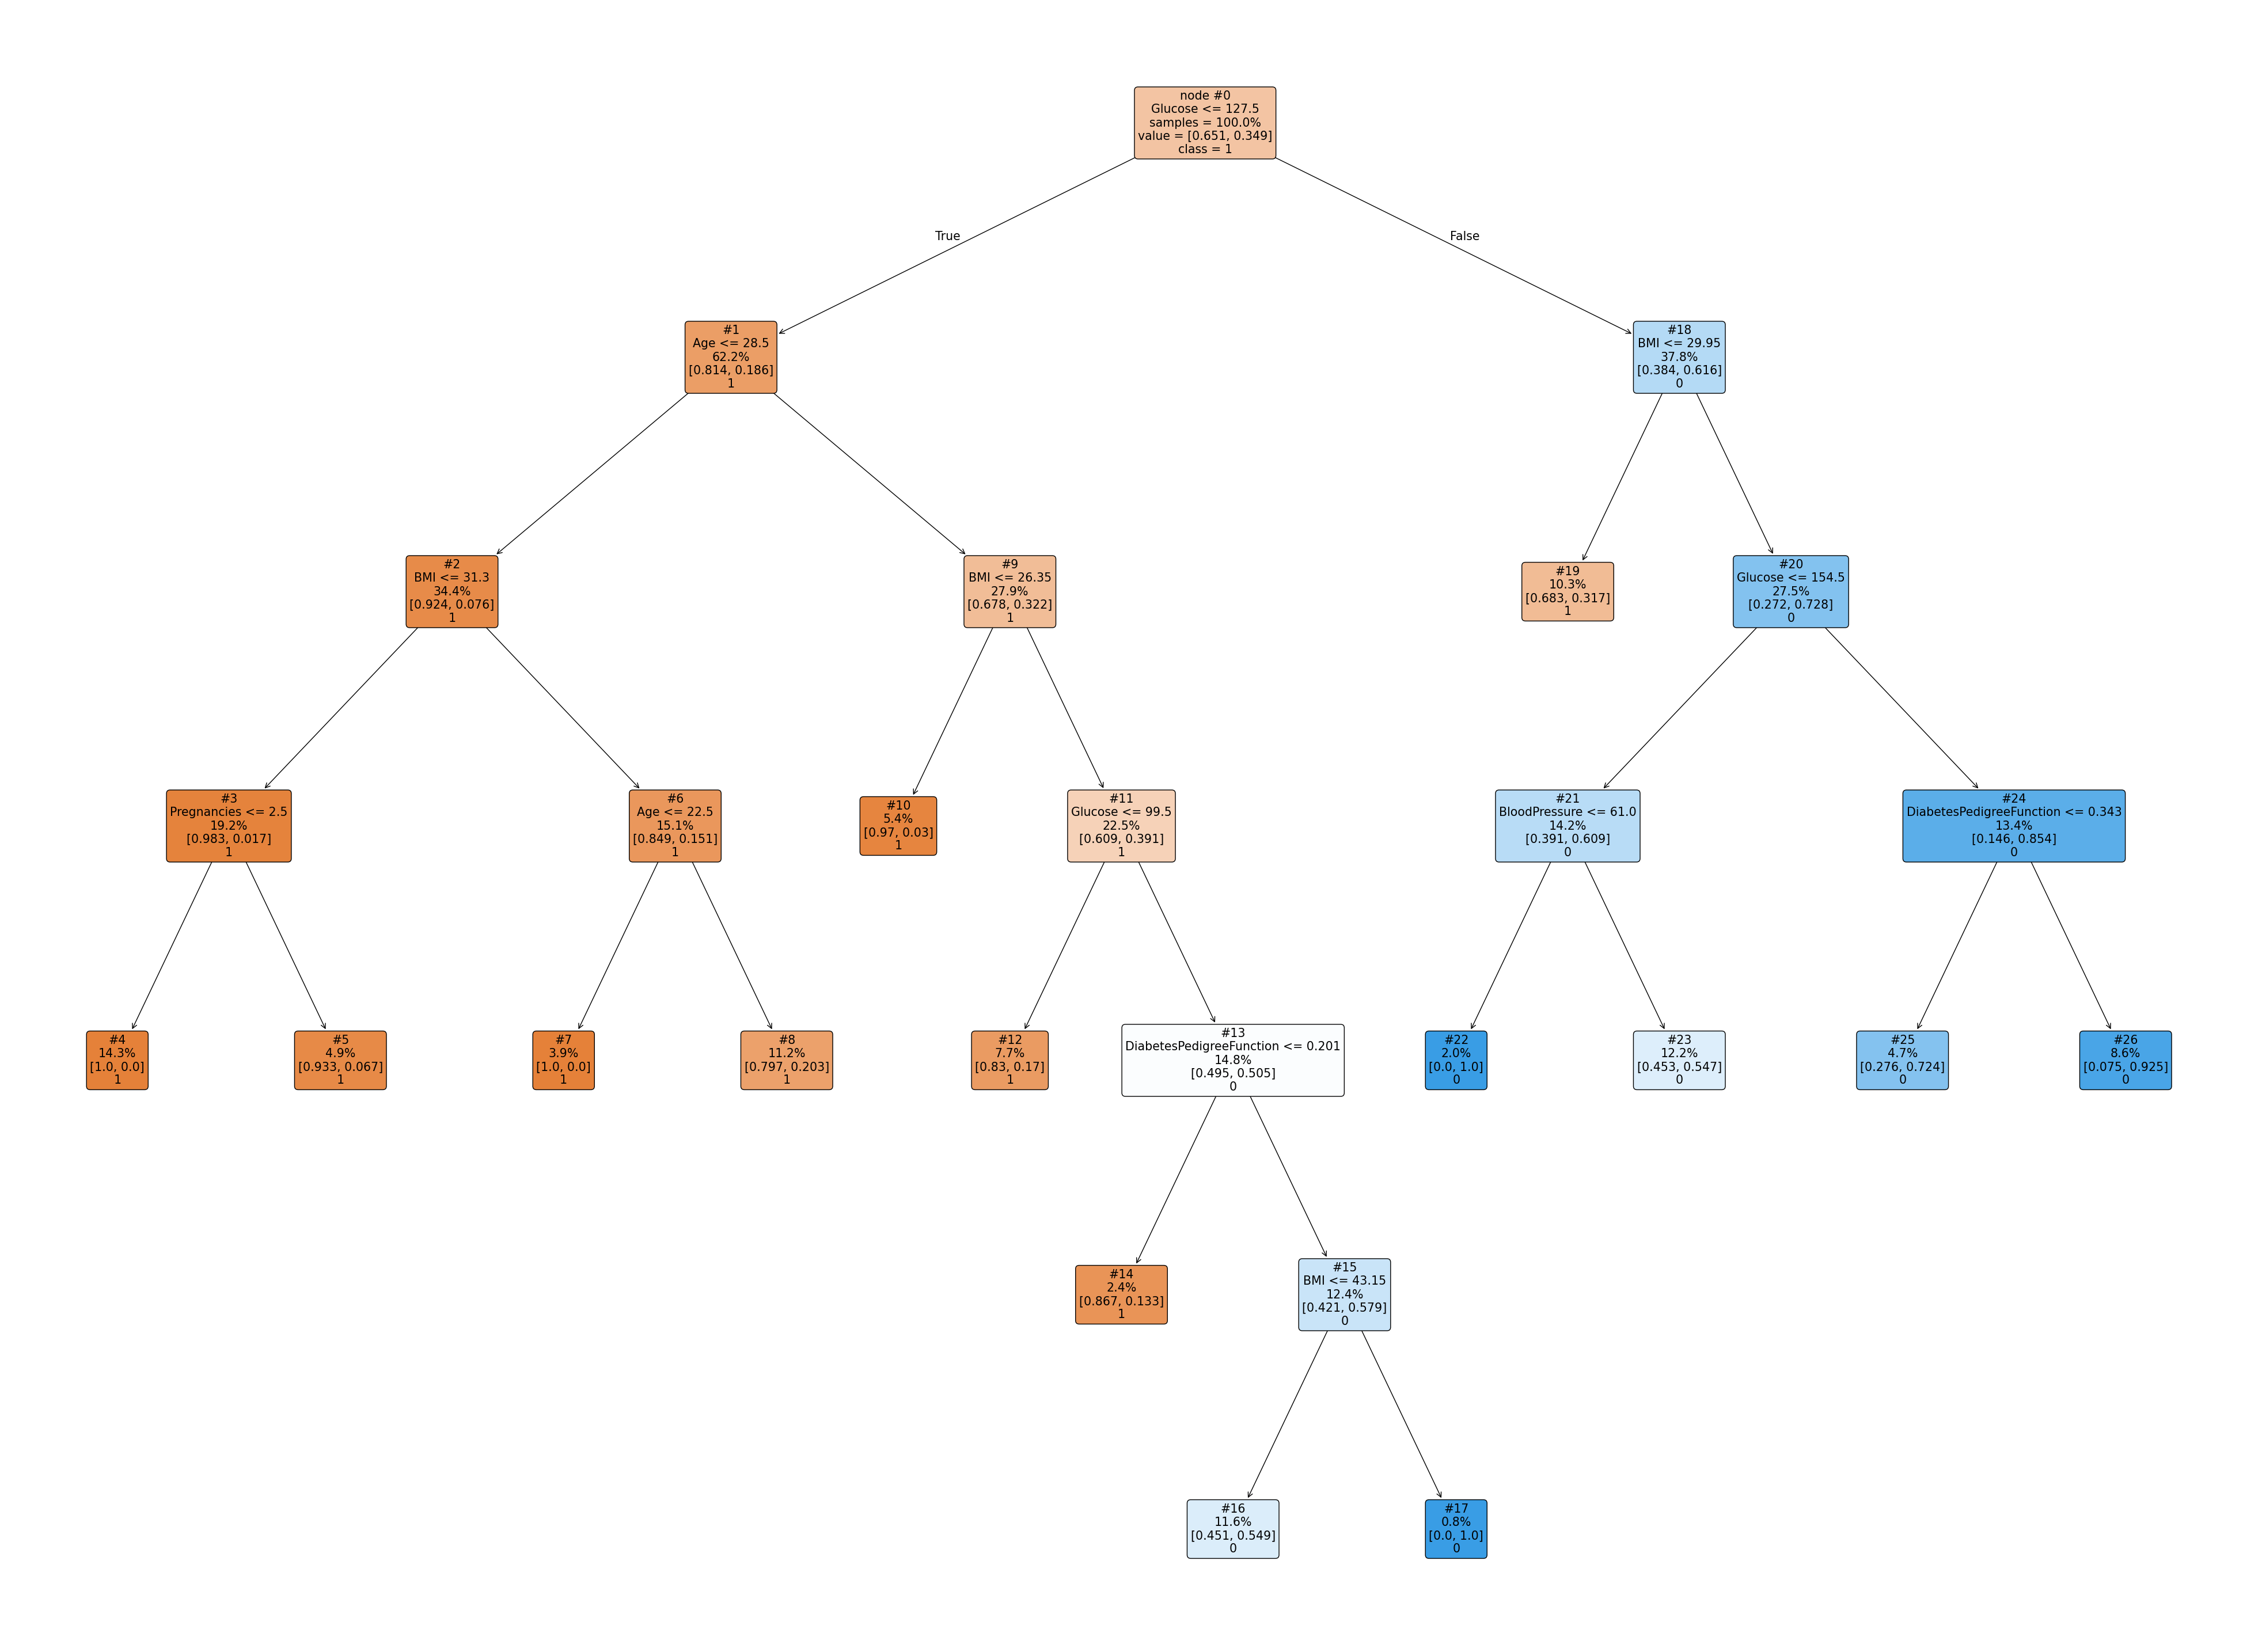

In [237]:
#plot tree
target = list(data['Outcome'].unique().astype('str'))
feature_names = list(data_feature.columns)
from sklearn import tree
from matplotlib import pyplot as plt
import os
plt.clf()
# strFile = "plot_dtree.png"
# if os.path.isfile(strFile):
#    os.remove(strFile)   
fig = plt.figure(figsize=(50,37))
_ = tree.plot_tree(dtree, feature_names=feature_names, class_names=target, filled=True,
        label='root', node_ids=True, proportion=True,rounded=True, impurity=False)#, fontsize=20) 
# fig.savefig(strFile)

## Support Vector Machine

In [267]:
from sklearn import svm
X_train, X_test, Y_train, Y_test = train_test_split(data_feature, data_diabetes, 
             stratify=data_diabetes, test_size=0.2, random_state=1) 

svm_model = svm.SVC(kernel='linear').fit(X_train, Y_train)

y_predict_svm = svm_model.predict(X_test)
metrics_measure(Y_test, y_predict_svm)

Accuracy :  0.779
Misclassification :  0.221
Precision :  0.763
Sensitivity/Recall 1:  0.537
Specificity/Recall 0:  0.91
F1-measure :  0.63


## K-Nearest Neighbours

In [270]:
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, Y_train, Y_test = train_test_split(data_feature, data_diabetes, 
             stratify=data_diabetes, test_size=0.2, random_state=1) 

knn_model = KNeighborsClassifier(n_neighbors=18)
knn_model = knn_model.fit(X_train, Y_train)

y_predict_knn = knn_model.predict(X_test)
metrics_measure(Y_test, y_predict_knn)

Accuracy :  0.74
Misclassification :  0.26
Precision :  0.706
Sensitivity/Recall 1:  0.444
Specificity/Recall 0:  0.9
F1-measure :  0.545


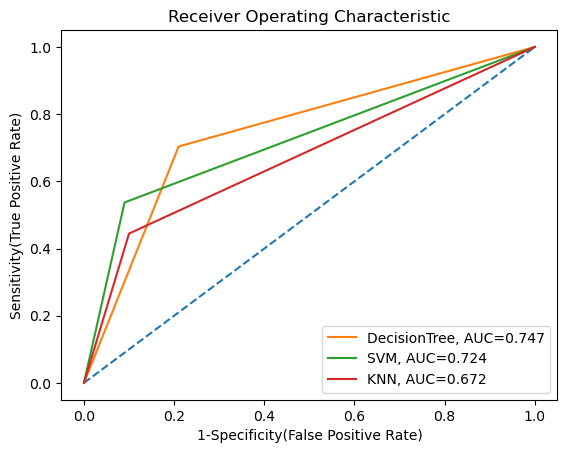

In [272]:
# initiate the plots of ROC charts for each model
plt.figure(0).clf()
plt.plot([0, 1], ls="--")

#fit DecisionTree model and plot ROC curve
fpr, tpr, _ = roc_curve(Y_test, y_predict_dtree)
auc1 = roc_auc_score(Y_test, y_predict_dtree)
plt.plot(fpr,tpr,label="DecisionTree, AUC="+str(round(auc1,3)))

#fit LogisticRegression model and plot ROC curve
fpr, tpr, _ = roc_curve(Y_test, y_predict_svm)
auc2 = roc_auc_score(Y_test, y_predict_svm)
plt.plot(fpr,tpr,label="SVM, AUC="+str(round(auc2,3)))

#fit SVC model and plot ROC curve
fpr, tpr, _ = roc_curve(Y_test, y_predict_knn)
auc3 = roc_auc_score(Y_test, y_predict_knn)
plt.plot(fpr,tpr,label="KNN, AUC="+str(round(auc3,3)))

#add legend information
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


## References

* Pima Indians Diabetes Database: Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press. Available at: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database 